In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from bidict import bidict
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix

In [2]:
ENCODER = bidict({
    'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6,
    'G': 7, 'H': 8, 'I': 9, 'J': 10, 'K': 11, 'L': 12,
    'M': 13, 'N': 14, 'O': 15, 'P': 16, 'Q': 17, 'R': 18,
    'S': 19, 'T': 20, 'U': 21, 'V': 22, 'W': 23, 'X': 24,
    'Y': 25, 'Z': 26
})

In [3]:
labels = np.load('../data/labels.npy')
labels = np.array([ENCODER[x] for x in labels])
labels.shape

(267,)

In [4]:
imgs = np.load('../data/images.npy')
imgs = imgs.astype("float32") / 255
imgs.shape

(267, 50, 50)

In [5]:
# plt.figure()
# plt.imshow(imgs[0])
# plt.grid(False)
# plt.show()

In [6]:
imgs = np.expand_dims(imgs, -1)

In [7]:
labels, imgs = shuffle(labels, imgs)
split = .75

labels_train = labels[:int(len(labels) * split)]
labels_test = labels[int(len(labels) * split):]

imgs_train = imgs[:int(len(imgs) * split)]
imgs_test = imgs[int(len(imgs) * split):]

In [8]:
batch_size = 16
epochs = 20

model = keras.Sequential([
    keras.Input(shape=(50, 50, 1)),
    layers.Conv2D(256, kernel_size=5, activation='relu'),
    layers.MaxPooling2D(pool_size=2),
    layers.Dropout(0.3),
    layers.Conv2D(512, kernel_size=5, activation='relu'),
    layers.MaxPooling2D(pool_size=2),
    layers.Dropout(0.3),
    layers.Conv2D(1024, kernel_size=5, activation='relu'),
    layers.MaxPooling2D(pool_size=2),
    layers.Dropout(0.3),
    layers.Flatten(),
    layers.Dense(len(ENCODER)+1, activation='softmax')
])

In [9]:
early_stopping = keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=2)
optimizer = keras.optimizers.Adam()

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [10]:
model.fit(imgs_train,
          labels_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(imgs_test, labels_test),
          callbacks=[early_stopping])

Epoch 1/20
13/13 [==============================] - 38s 3s/step - loss: 3.3153 - accuracy: 0.1000 - val_loss: 3.1635 - val_accuracy: 0.0597
Epoch 2/20
13/13 [==============================] - 48s 4s/step - loss: 2.2398 - accuracy: 0.3550 - val_loss: 1.3866 - val_accuracy: 0.6716
Epoch 3/20
13/13 [==============================] - 53s 4s/step - loss: 0.7259 - accuracy: 0.8250 - val_loss: 0.4682 - val_accuracy: 0.8507
Epoch 4/20
13/13 [==============================] - 46s 3s/step - loss: 0.3938 - accuracy: 0.8900 - val_loss: 0.4231 - val_accuracy: 0.8657
Epoch 5/20
13/13 [==============================] - 63s 5s/step - loss: 0.0902 - accuracy: 0.9800 - val_loss: 0.1895 - val_accuracy: 0.9403
Epoch 6/20
13/13 [==============================] - 49s 4s/step - loss: 0.0293 - accuracy: 0.9900 - val_loss: 0.2661 - val_accuracy: 0.9254
Epoch 7/20
13/13 [==============================] - 52s 4s/step - loss: 0.1243 - accuracy: 0.9750 - val_loss: 0.2520 - val_accuracy: 0.9552
Epoch 8/20
13/13 [==

In [11]:
labels_pred = np.argmax(model.predict(imgs_test), axis=-1)

3/3 [==============================] - 4s 776ms/step


In [12]:
cm = confusion_matrix(labels_test, labels_pred, labels=list(ENCODER.inverse.keys()))

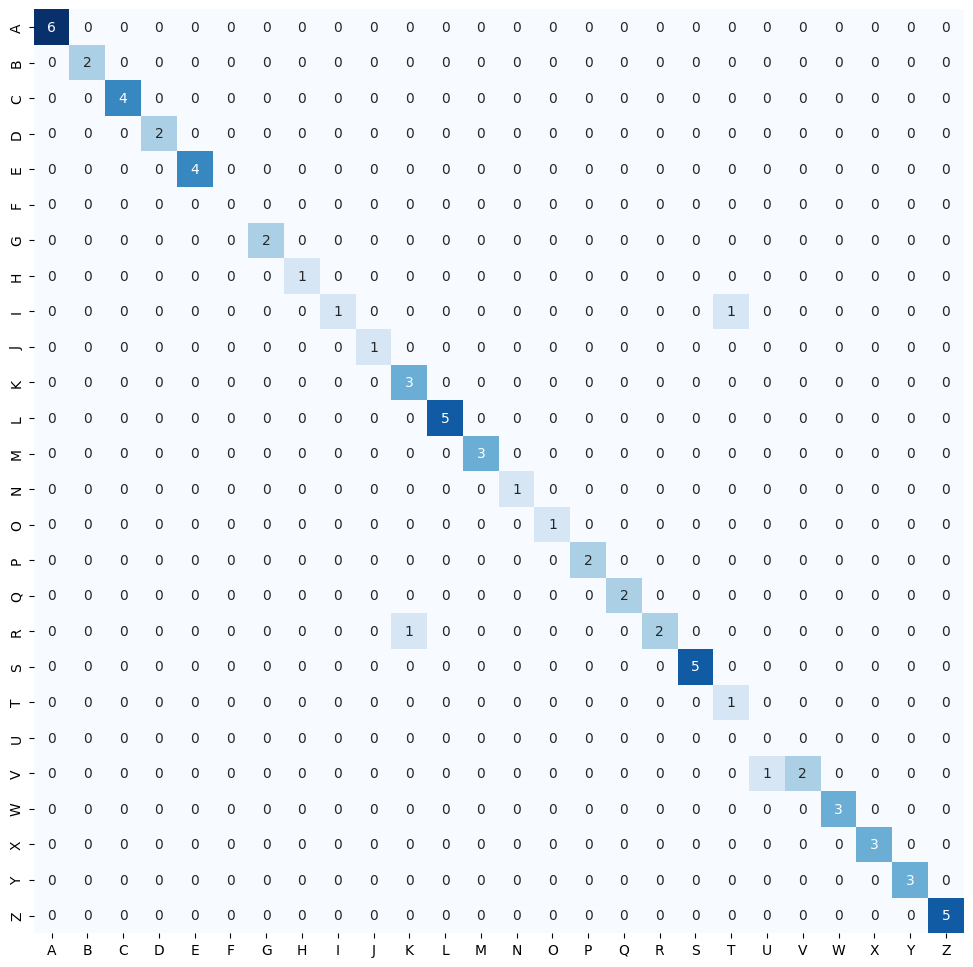

In [13]:
plt.figure(figsize=(12, 12))
sns.heatmap(cm, annot=True, cbar=False, cmap="Blues", xticklabels=list(ENCODER.keys()), yticklabels=list(ENCODER.keys()))
plt.show()

In [14]:
model.save('../letter.model')

INFO:tensorflow:Assets written to: ../letter.model\assets


INFO:tensorflow:Assets written to: ../letter.model\assets
